In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data


In [4]:
data=pd.read_csv(r"C:\Users\sathy\Downloads\shootings.csv")


# Checking the structure of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

# Checking the null values

In [6]:
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

# Checking the duplicate values

In [7]:
data.duplicated().sum()

0

# Summary of the table

In [8]:
data.describe(include=object).T

,count,unique,top,freq
name,4895,4851,TK TK,29
date,4895,1792,2018-06-29,9
manner_of_death,4895,2,shot,4647
armed,4895,89,gun,2755
gender,4895,2,M,4673
race,4895,6,White,2476
city,4895,2288,Los Angeles,78
state,4895,51,CA,701
threat_level,4895,3,attack,3160
flee,4895,4,Not fleeing,3073


# Fetching the unique data of Race columns

In [9]:
data['race'].value_counts()

race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: count, dtype: int64

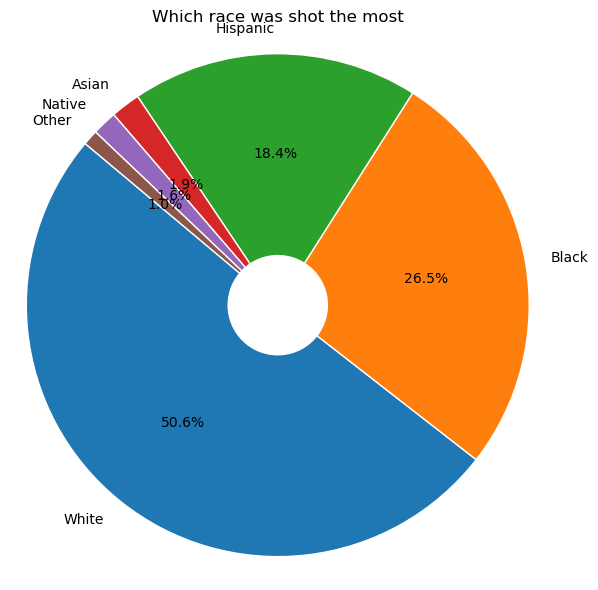

In [10]:

# Calculate counts of each race
race_counts = data['race'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

# Draw a circle in the middle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.20, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Which race was shot the most')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


### Assigning the data frame for top 10 cities which involved in the race

In [11]:
topcity = data.city.value_counts().to_frame().reset_index()
topcity=topcity[0:10]
topcity

,city,count
0,Los Angeles,78
1,Phoenix,66
2,Houston,51
3,Las Vegas,41
4,San Antonio,40
5,Chicago,38
6,Columbus,36
7,Albuquerque,32
8,Jacksonville,31
9,St. Louis,30


<Axes: title={'center': 'Top city with shooting counts'}, xlabel='city', ylabel='count'>

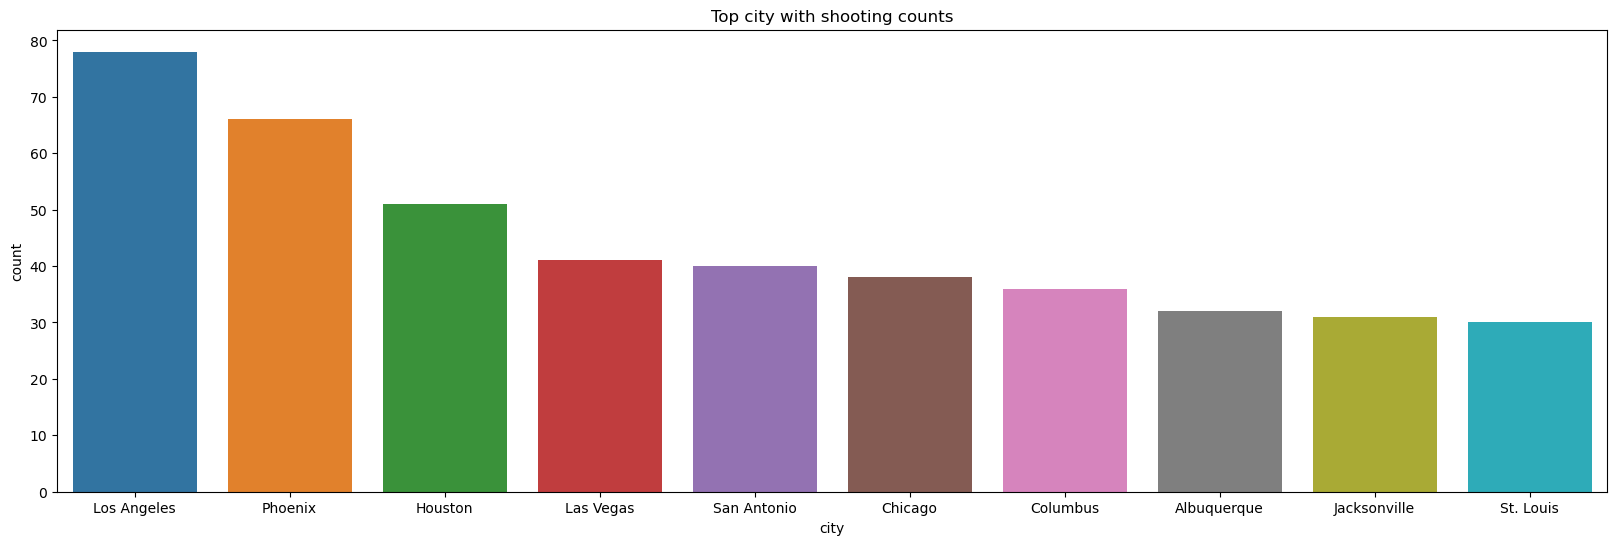

In [12]:
plt.figure(figsize=(20,6))
plt.title('Top city with shooting counts')
sns.barplot(data=topcity,x='city',y='count')

### checking the mental illness of the racer

In [13]:
data.signs_of_mental_illness.value_counts()

signs_of_mental_illness
False    3792
True     1103
Name: count, dtype: int64

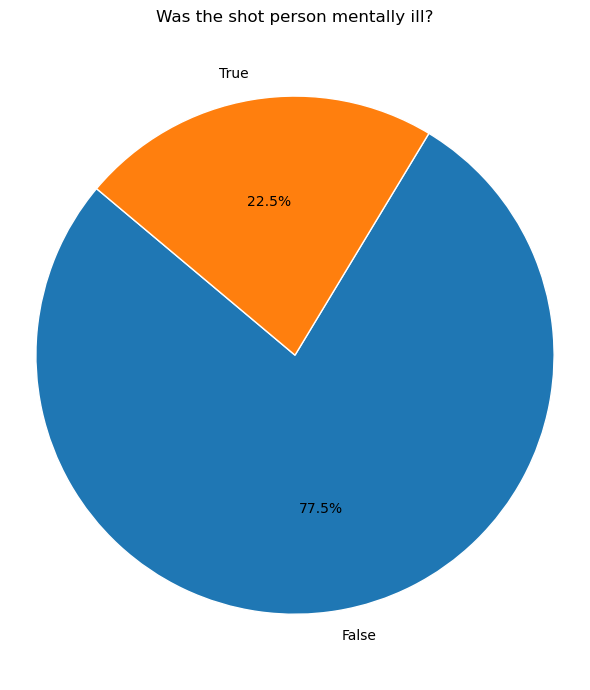

In [14]:

# Calculate counts of each category
mental_illness_counts = data['signs_of_mental_illness'].value_counts()

# Plotting
plt.figure(figsize=(6, 7))
plt.pie(mental_illness_counts, labels=mental_illness_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

plt.title('Was the shot person mentally ill?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


## checking the threat level of the suspects

In [15]:
data.threat_level.value_counts()

threat_level
attack          3160
other           1528
undetermined     207
Name: count, dtype: int64

<Axes: title={'center': 'Threat Level Of the Suspect'}, xlabel='threat_level', ylabel='count'>

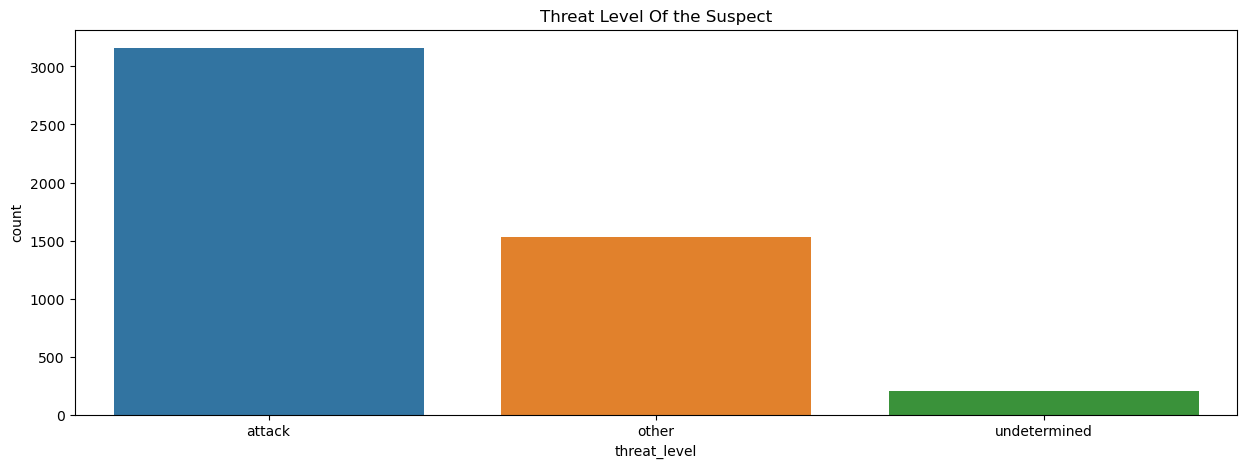

In [16]:
plt.figure(figsize=(15,5))
plt.title('Threat Level Of the Suspect')
sns.countplot(data = data, x = 'threat_level')

## Number of suspect trying to flee

In [17]:
data.flee.value_counts()

flee
Not fleeing    3073
Car             820
Foot            642
Other           360
Name: count, dtype: int64

<Axes: title={'center': 'Suspect Flee vs Not Flee'}, xlabel='flee', ylabel='count'>

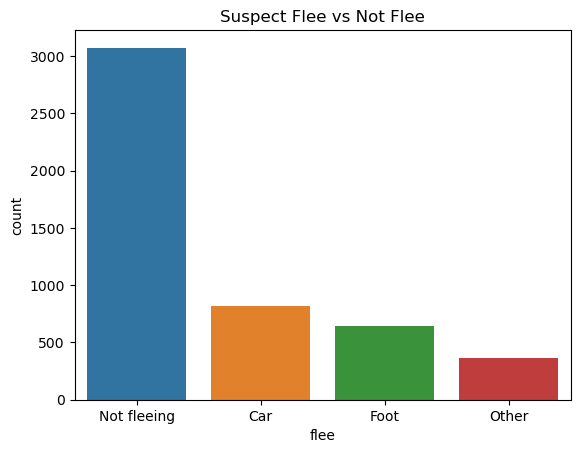

In [18]:
plt.title('Suspect Flee vs Not Flee')
sns.countplot(data = data, x = 'flee')

In [19]:
data.arms_category.value_counts()

arms_category
Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: count, dtype: int64

<Axes: title={'center': 'Suspect Flee vs Not Flee'}, xlabel='count', ylabel='arms_category'>

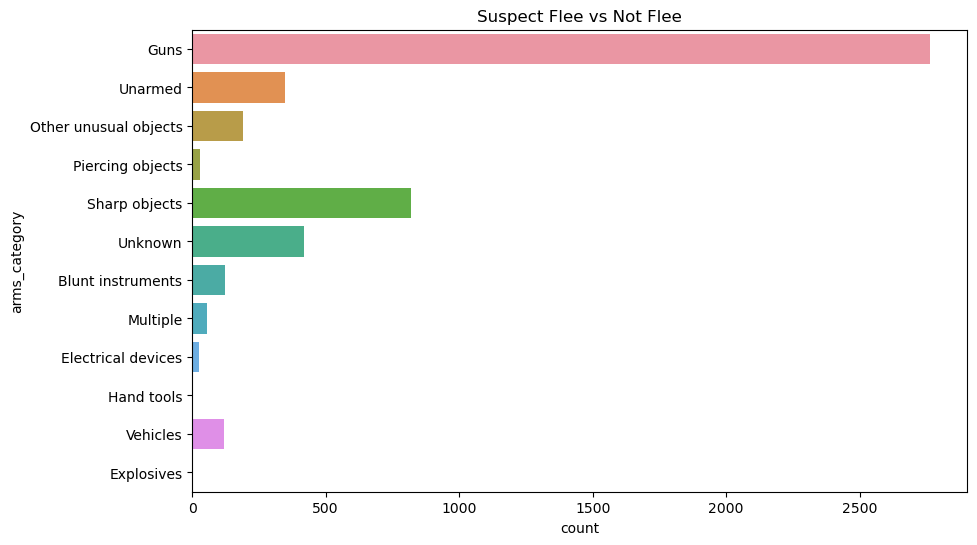

In [20]:
plt.figure(figsize=(10,6))
plt.title('Suspects ')
sns.countplot(data = data, y = 'arms_category')

## Manner of death

In [21]:
data.manner_of_death.value_counts()

manner_of_death
shot                4647
shot and Tasered     248
Name: count, dtype: int64

<Axes: title={'center': 'Manner of Death'}, xlabel='manner_of_death', ylabel='count'>

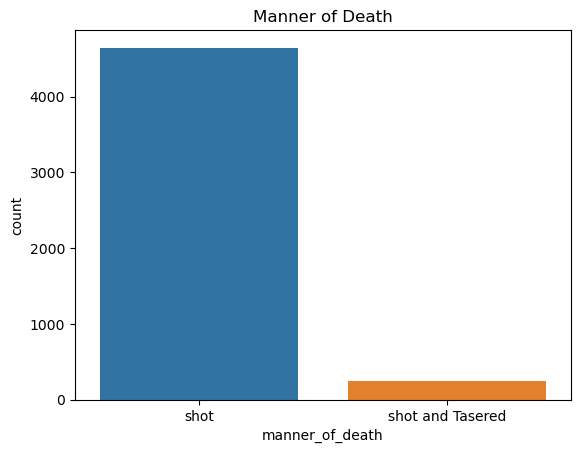

In [22]:
plt.title('Manner of Death')
sns.countplot(data = data, x = 'manner_of_death')

## age category of suspects

In [23]:
data.age.describe(include=object).T

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

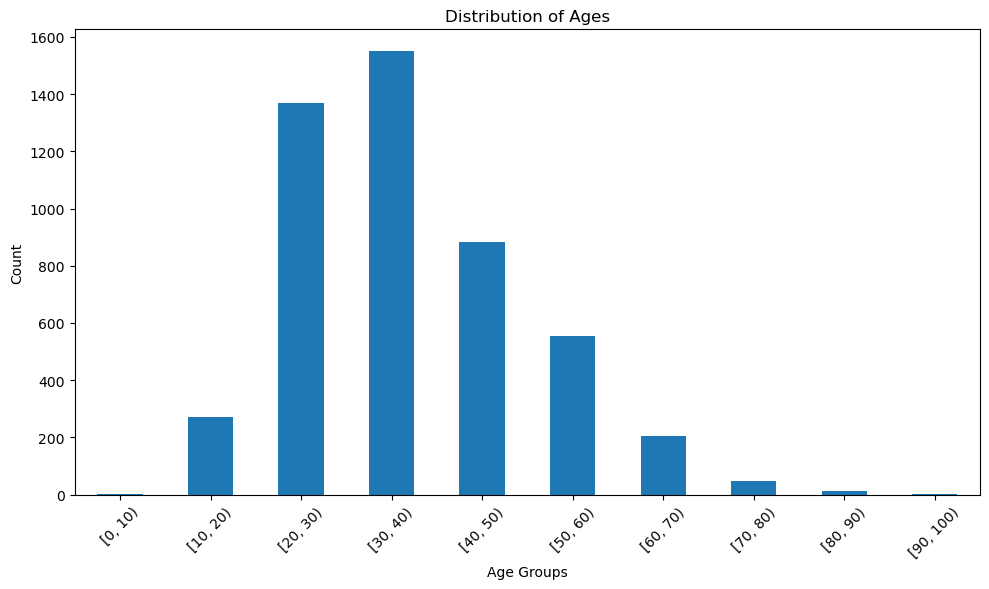

In [24]:
import matplotlib.pyplot as plt

# Binning ages into groups (e.g., every 5 years)
bins = range(0, 101, 10)  # adjust range and bin size as needed
data['age_group'] = pd.cut(data['age'], bins=bins, right=False)

# Plotting
plt.figure(figsize=(10, 6))
data['age_group'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
